# Acquire

In this section we will acquire the Major League Baseball data using acquire.py file.

- Data acquired from batting, pitching and fielding game logs for the 2022 MLB season for all 30 teams
- All logs were combined into one .csv file
- When using SR data, please cite us and provide a link and/or a mention.
    - Data source is baseball-reference.com


### Read data from local .csv into a dataframe to use for exploration and modeling

In [1]:
#Disable warnings
import warnings
warnings.filterwarnings('ignore')

#Import libraries 
import pandas as pd
import numpy as np

# import models
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import sklearn.feature_selection as feat_select
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, normalize

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#Import custom libraries
import acquire
import prepare
import explore

#Import libraries for graphing
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


In [2]:
df = acquire.get_MLB_log_data()

In [3]:
df.head()

,Team,Date,Opp,Rslt,plate_app,at_bats,runs_scored,hits,doubles,triples,...,roll_double_plays,roll_stolen_bases,roll_caught_stealing,roll_batting_avg,roll_OBP,roll_SLG,roll_OPS,roll_left_on_base,roll_num_players_used,roll_is_win
0,Arizona Dbacks,1-Apr,SDP,"L,7-8",41,40,7,12,3,0,...,0.000000,0.000000,0.0,0.300000,0.317000,0.675000,0.992000,7.000000,16.000000,0.000000
1,Arizona Dbacks,2-Apr,SDP,"L,2-4",38,36,2,8,1,0,...,0.500000,0.500000,0.0,0.281500,0.304000,0.594000,0.898000,8.000000,16.500000,0.000000
2,Arizona Dbacks,3-Apr,SDP,"L,0-7",30,30,0,4,0,0,...,0.666667,0.333333,0.0,0.263000,0.285333,0.531333,0.816333,6.333333,15.333333,0.000000
3,Arizona Dbacks,4-Apr,SDP,"W,3-1",38,32,3,6,1,1,...,1.333333,0.333333,0.0,0.235333,0.268000,0.432000,0.699667,6.666667,15.333333,0.333333
4,Arizona Dbacks,6-Apr,COL,"W,10-8",57,53,10,13,3,0,...,1.000000,0.000000,0.0,0.222667,0.262667,0.390000,0.652333,6.333333,16.000000,0.666667


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Team                    4858 non-null   object 
 1   Date                    4858 non-null   object 
 2   Opp                     4858 non-null   object 
 3   Rslt                    4858 non-null   object 
 4   plate_app               4858 non-null   int64  
 5   at_bats                 4858 non-null   int64  
 6   runs_scored             4858 non-null   int64  
 7   hits                    4858 non-null   int64  
 8   doubles                 4858 non-null   int64  
 9   triples                 4858 non-null   int64  
 10  HR                      4858 non-null   int64  
 11  RBI                     4858 non-null   int64  
 12  bases_on_balls          4858 non-null   int64  
 13  intentional_bb          4858 non-null   int64  
 14  strikeouts              4858 non-null   

####  Acquired 2021 MLB data successfully.

# Prepare

In this section we will clean and prepare data the obtained to use for exploration and modeling using the function in prepare.py file.

In [5]:
df = prepare.prepare_data()
df.head(3)

,Team,Date,Opp,Rslt,plate_app,at_bats,runs_scored,hits,doubles,triples,...,roll_double_plays,roll_stolen_bases,roll_caught_stealing,roll_batting_avg,roll_OBP,roll_SLG,roll_OPS,roll_left_on_base,roll_num_players_used,roll_is_win
0,Arizona Dbacks,1-Apr,SDP,"L,7-8",41,40,7,12,3,0,...,0.000000,0.000000,0.0,0.3000,0.317000,0.675000,0.992000,7.000000,16.000000,0.0
1,Arizona Dbacks,2-Apr,SDP,"L,2-4",38,36,2,8,1,0,...,0.500000,0.500000,0.0,0.2815,0.304000,0.594000,0.898000,8.000000,16.500000,0.0
2,Arizona Dbacks,3-Apr,SDP,"L,0-7",30,30,0,4,0,0,...,0.666667,0.333333,0.0,0.2630,0.285333,0.531333,0.816333,6.333333,15.333333,0.0


### Takeaways:

- Created 3 game rolling average columns for all hitting stats for use in predictive modeling
- Created 'is_away' column to capture that the game was played away, not at home stadium
- Renamed columns for easier readability
- Created 'is_win' column to capture the result of the game, win or loss
- Created 'made_playoffs' to capture whether the team made it to the playoffs
- Dropped unnecessary columns, "Rk", "Gtm", "Unnamed: 4" and because they were used on the website to show the count of the columns in the table, the game number of the season, and the "@" to indicate away game which a new column was created to capture.
- Created function, prepare_data(), to clean up and prepare all data acquired as described above
- Created dummy variables for categorical features


# Explore
### Questions to Consider Before Exploration:

- What features are most correlated to winning?
- What features rank highest amongst the most winning teams?
- Does being away from the team's home stadium affect wins?
- Does the number of walks correlate to winning?
- Does the either singles, doubles, or triples affect winning?
- Does clustering features better predict a win?
- Can we create a model to predict a win based on baseball hitting data?

**Now that we have acquired and prepared the baseball data, we will begin to explore it.**

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Team                    4858 non-null   object 
 1   Date                    4858 non-null   object 
 2   Opp                     4858 non-null   object 
 3   Rslt                    4858 non-null   object 
 4   plate_app               4858 non-null   int64  
 5   at_bats                 4858 non-null   int64  
 6   runs_scored             4858 non-null   int64  
 7   hits                    4858 non-null   int64  
 8   doubles                 4858 non-null   int64  
 9   triples                 4858 non-null   int64  
 10  HR                      4858 non-null   int64  
 11  RBI                     4858 non-null   int64  
 12  bases_on_balls          4858 non-null   int64  
 13  intentional_bb          4858 non-null   int64  
 14  strikeouts              4858 non-null   

In [7]:
df.shape

(4858, 58)

- Let's take a look at the values in the dataframe


In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
plate_app,4858.0,37.426513,4.970414,21.000000,34.000000,37.000000,40.000000,63.000000
at_bats,4858.0,33.334911,4.051859,17.000000,31.000000,33.000000,36.000000,57.000000
runs_scored,4858.0,4.530671,3.184529,0.000000,2.000000,4.000000,6.000000,24.000000
hits,4858.0,8.127007,3.324612,0.000000,6.000000,8.000000,10.000000,22.000000
doubles,4858.0,1.618567,1.340229,0.000000,1.000000,1.000000,2.000000,9.000000
triples,4858.0,0.137917,0.375708,0.000000,0.000000,0.000000,0.000000,2.000000
HR,4858.0,1.223549,1.182470,0.000000,0.000000,1.000000,2.000000,8.000000
RBI,4858.0,4.321326,3.103705,0.000000,2.000000,4.000000,6.000000,23.000000
bases_on_balls,4858.0,3.251132,2.059723,0.000000,2.000000,3.000000,4.000000,14.000000
intentional_bb,4858.0,0.144710,0.439755,0.000000,0.000000,0.000000,0.000000,8.000000


## Univariate Exploration
Let's take a quick look at the distribution of all the baseball stats in our dataframe.



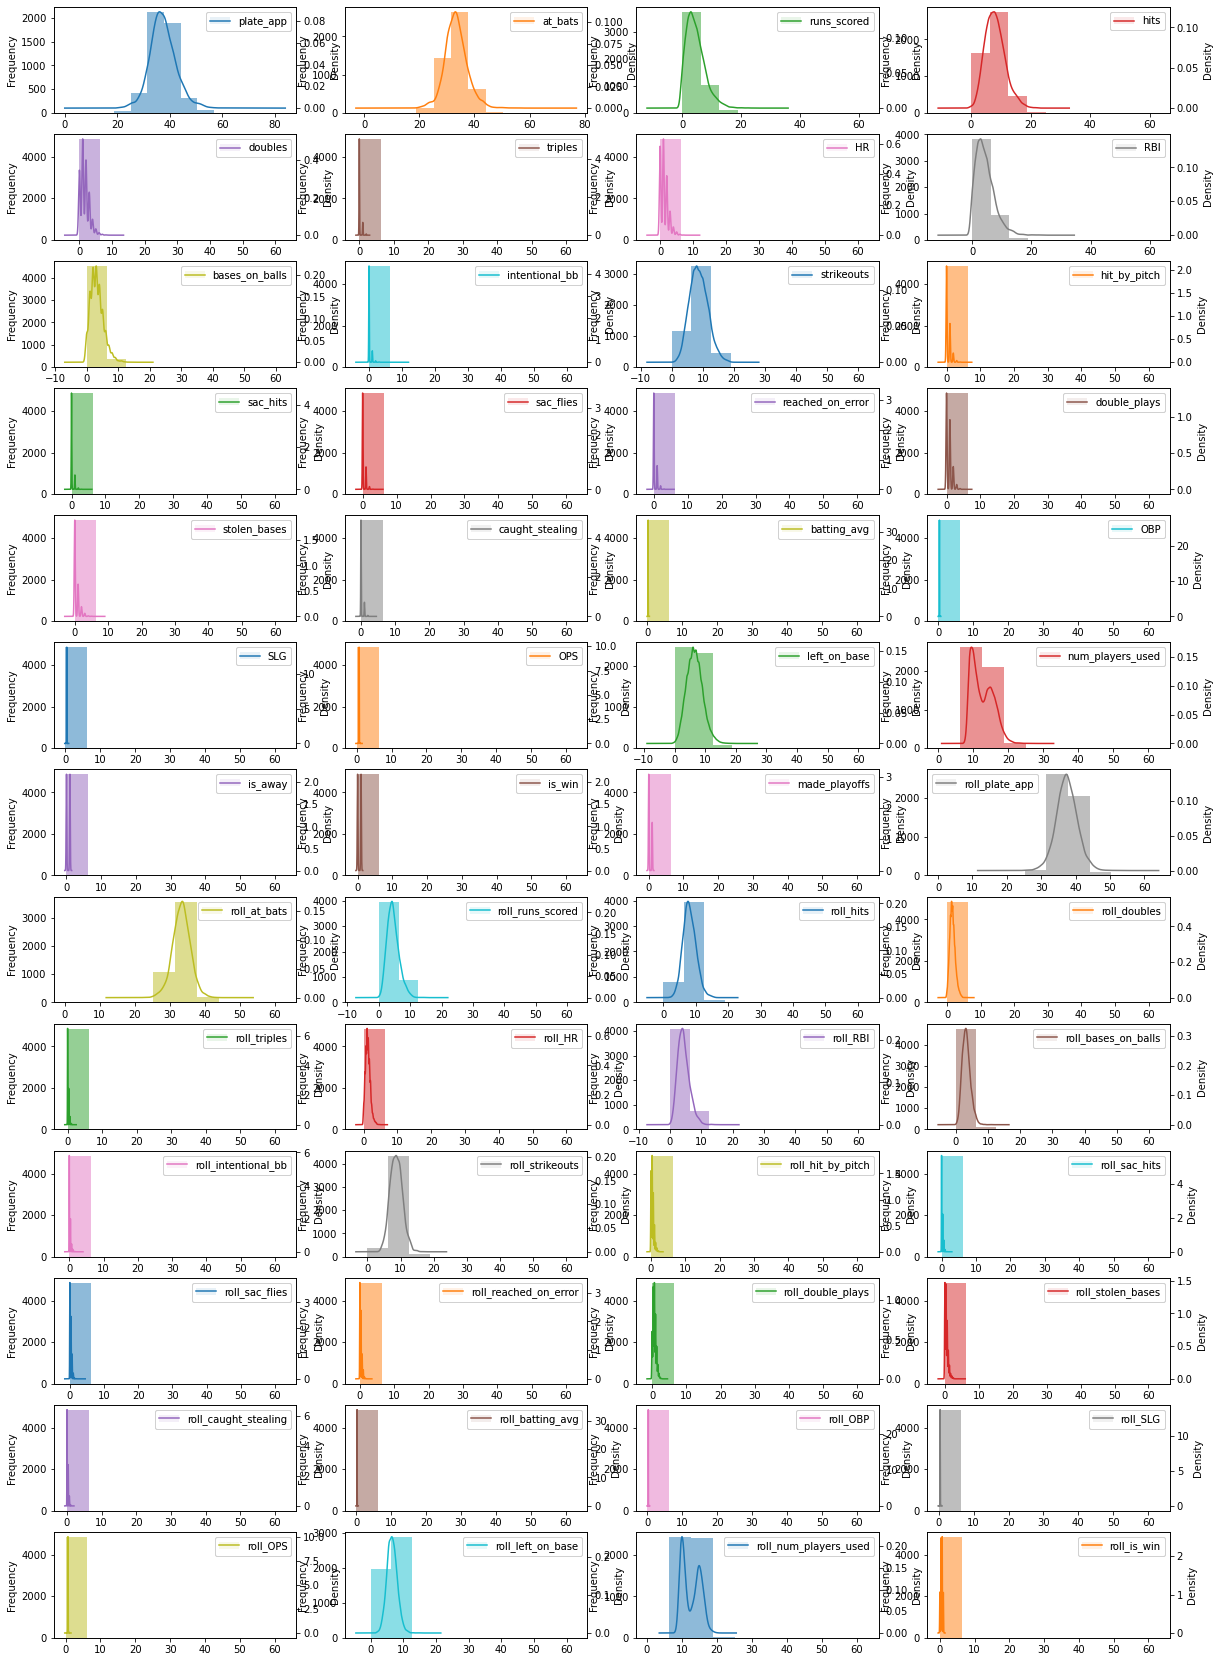

In [9]:
# draw hist
fig, axes = plt.subplots(13,4, figsize=(20,30))
df.plot(kind='hist', subplots=True, ax=axes, alpha=0.5)

# clone axes so they have different scales
ax_new = [ax.twinx() for ax in axes.flatten()]
df.plot(kind='kde', ax=ax_new, subplots=True)
plt.show()


In [10]:
#Take a look at the target variable 
df.is_win.sum(), df.shape[0]


(2429, 4858)

- Half of the teams won and half lost, as is the case when two teams play against each other.

Text(0.5, 1.0, 'Histogram of Runs Scored')

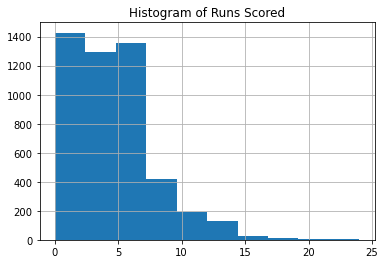

In [12]:
df.runs_scored.hist()
plt.title("Histogram of Runs Scored")


In [13]:
df.runs_scored.describe()


count    4858.000000
mean        4.530671
std         3.184529
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        24.000000
Name: runs_scored, dtype: float64

#### - Majority of games had less than 4 runs scored

Text(0.5, 1.0, 'Histogram of At Bats')

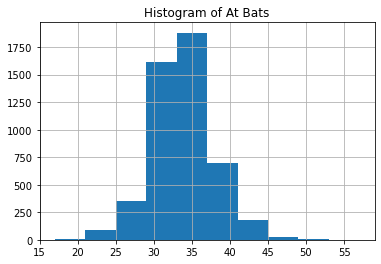

In [14]:
df.at_bats.hist()
plt.title("Histogram of At Bats")

In [15]:
df.at_bats.describe()

count    4858.000000
mean       33.334911
std         4.051859
min        17.000000
25%        31.000000
50%        33.000000
75%        36.000000
max        57.000000
Name: at_bats, dtype: float64

- Most games had between 28-37 player at bats.


Text(0.5, 1.0, 'Histogram of Hits')

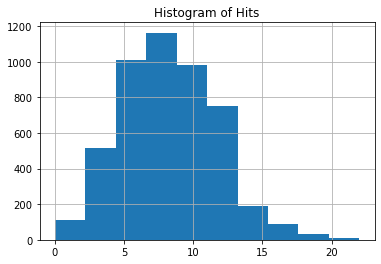

In [16]:
df.hits.hist()
plt.title("Histogram of Hits")

In [17]:
df.hits.describe()

count    4858.000000
mean        8.127007
std         3.324612
min         0.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        22.000000
Name: hits, dtype: float64

- Most games had about 8 hits.


Text(0.5, 1.0, 'Histogram of Doubles ')

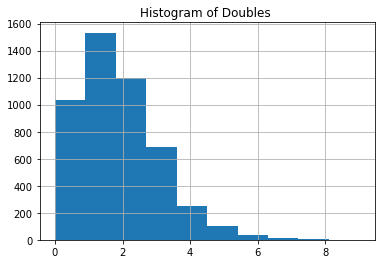

In [18]:
df.doubles.hist()
plt.title("Histogram of Doubles ")

In [19]:
df.doubles.describe()


count    4858.000000
mean        1.618567
std         1.340229
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: doubles, dtype: float64

- Most games had either one or two doubles.


Text(0.5, 1.0, 'Histogram of Triples Scored')

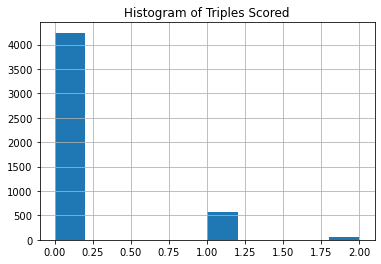

In [20]:
df.triples.hist()
plt.title("Histogram of Triples Scored")

In [21]:
df.triples.value_counts()


0    4242
1     562
2      54
Name: triples, dtype: int64

- Most games did not have a triple in the game. Triple plays are rear in MLB games 

Text(0.5, 1.0, 'Histogram of Homeruns')

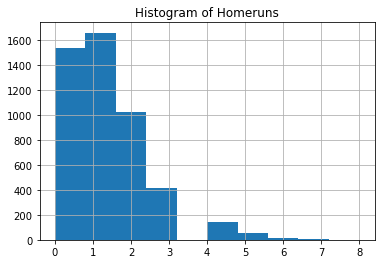

In [22]:
df.HR.hist()
plt.title("Histogram of Homeruns")

In [23]:
df.HR.describe()


count    4858.000000
mean        1.223549
std         1.182470
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: HR, dtype: float64

- About a third of the games had one homerun. 

Text(0.5, 1.0, 'Histogram of Runs Batted In')

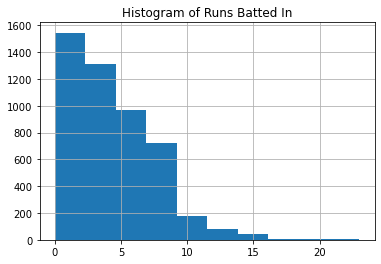

In [24]:
df.RBI.hist()
plt.title("Histogram of Runs Batted In")

In [25]:
df.RBI.describe()


count    4858.000000
mean        4.321326
std         3.103705
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        23.000000
Name: RBI, dtype: float64

In [26]:
- Most games have less then 5 runs batted in per game.


SyntaxError: invalid syntax (2424668297.py, line 1)

Text(0.5, 1.0, 'Histogram of Batting Average')

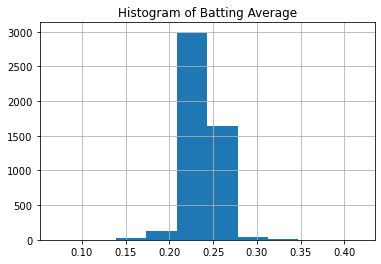

In [27]:
df.batting_avg.hist()
plt.title("Histogram of Batting Average")


In [28]:
df.batting_avg.describe()

count    4858.000000
mean        0.238875
std         0.018086
min         0.069000
25%         0.231000
50%         0.238000
75%         0.247000
max         0.417000
Name: batting_avg, dtype: float64

- Most teams have a batting average between 0.21 and 0.27


<AxesSubplot:>

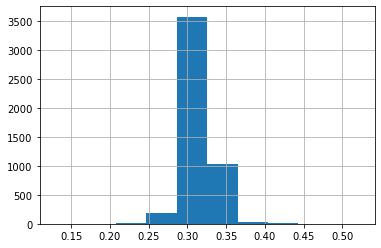

In [29]:
df.OBP.hist()


In [30]:
df.OBP.describe()

count    4858.000000
mean        0.314458
std         0.019108
min         0.129000
25%         0.304000
50%         0.315000
75%         0.324000
max         0.522000
Name: OBP, dtype: float64

- Most teams have an On Base Percentage of about 0.31


df.OPS.hist()


- Most team have an On Base + Slugging Percentage of about 0.7.


<AxesSubplot:>

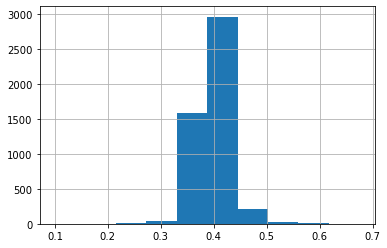

In [31]:
df.SLG.hist()


In [32]:
df.SLG.describe()

count    4858.000000
mean        0.400348
std         0.033317
min         0.100000
25%         0.381000
50%         0.399000
75%         0.420000
max         0.675000
Name: SLG, dtype: float64

- Most teams have a Slugging Percentage (Total bases / At Bats) of about 0.4


<AxesSubplot:>

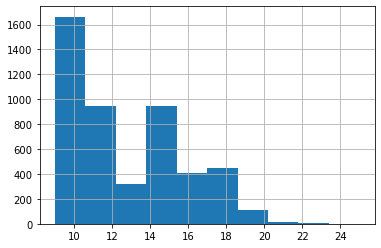

In [33]:
df.num_players_used.hist()

In [34]:
df.num_players_used.describe()

count    4858.000000
mean       12.621655
std         3.007252
min         9.000000
25%        10.000000
50%        12.000000
75%        15.000000
max        25.000000
Name: num_players_used, dtype: float64

- Most games used about 12 players on average


<AxesSubplot:>

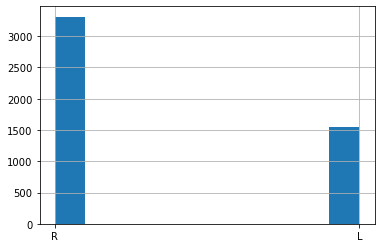

In [35]:
df.handedness_opp_pitcher.hist()

- Most MLB pitchers are right-handed.


In [36]:
# Made the playoffs
pf = df[df['made_playoffs']==1]
pf.groupby("Team").made_playoffs.nunique()

Team
Atlanta Braves         1
Boston Red Sox         1
Chicago White Sox      1
Houston Astros         1
L.A. Dodgers           1
Milwaukee Brewers      1
N.Y. Yankees           1
S.F. Giants            1
St. Louis Cardinals    1
Tampa Bay Rays         1
Name: made_playoffs, dtype: int64

- **Only 10 teams make the playoffs out of the 30 teams in MLB**


## Split Data into Train, Validate, and Test Sets

### Before exploring relationships between two or more variables, we will split the data into train, validate, and test sets.

In [37]:
train, validate, test = prepare.train_validate_test_split(df, 'is_win', seed=123)
train.shape, validate.shape, test.shape

((2720, 58), (1166, 58), (972, 58))

### Bivariate Exploration


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Team                    4858 non-null   object 
 1   Date                    4858 non-null   object 
 2   Opp                     4858 non-null   object 
 3   Rslt                    4858 non-null   object 
 4   plate_app               4858 non-null   int64  
 5   at_bats                 4858 non-null   int64  
 6   runs_scored             4858 non-null   int64  
 7   hits                    4858 non-null   int64  
 8   doubles                 4858 non-null   int64  
 9   triples                 4858 non-null   int64  
 10  HR                      4858 non-null   int64  
 11  RBI                     4858 non-null   int64  
 12  bases_on_balls          4858 non-null   int64  
 13  intentional_bb          4858 non-null   int64  
 14  strikeouts              4858 non-null   

In [39]:
cat_vars = ['Team', 'is_away', 'handedness_opp_pitcher','made_playoffs']
quant_vars = [
       'hits', 'doubles', 'triples', 'HR', 'RBI', 'bases_on_balls']

In [40]:
cat_vars = cat_vars[1:]


runs_scored 
____________________



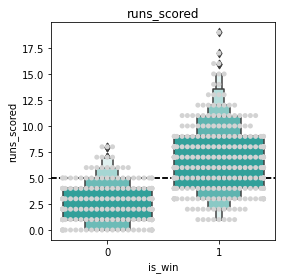

        count      mean       std  min  25%  50%  75%   max
is_win                                                     
0       195.0  2.661538  1.942022  0.0  1.0  2.0  4.0   8.0
1       270.0  6.696296  3.307700  1.0  4.0  6.0  9.0  19.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=7526.5, pvalue=8.221153176639318e-40)

____________________



In [41]:
#explore.explore_bivariate(train, 'is_win', cat_vars, quant_vars)
playoff_away_subset = train[(train.is_away==1) & (train.made_playoffs==1)]

explore.explore_bivariate_quant(playoff_away_subset, 'is_win', 'runs_scored')

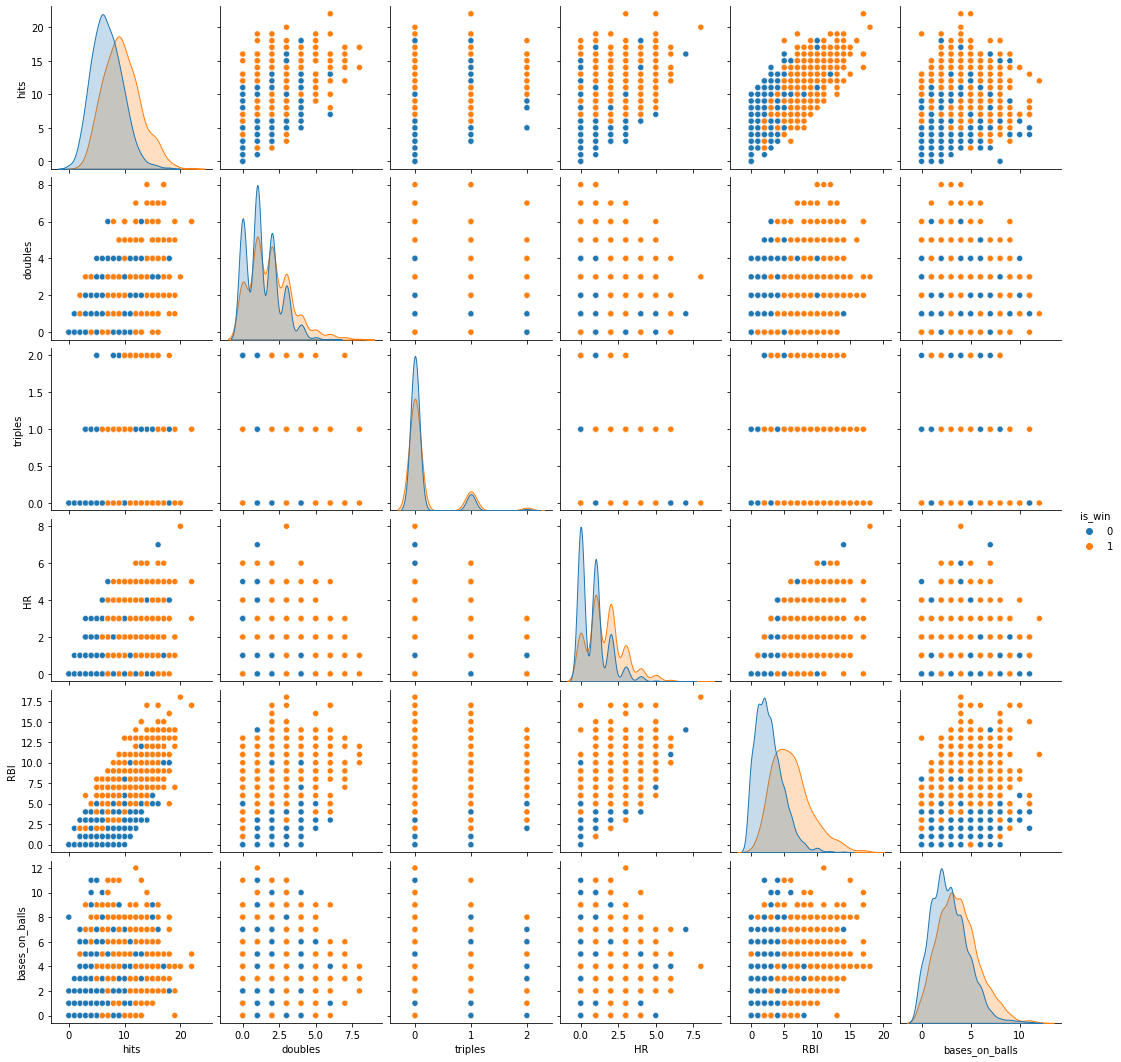

In [42]:
pair = sns.pairplot(data=train, vars=quant_vars, hue="is_win")
plt.show()


In [43]:
# explore.explore_multivariate(train, target, cat_vars, quant_vars)
target = 'is_win'


In [44]:
#Let's look at how variables are correlated using Spearman's correlation method
corr_train = train[[ 'Team','plate_app', 'at_bats', 'runs_scored',
       'hits', 'doubles', 'triples', 'HR', 'RBI', 'bases_on_balls',
       'intentional_bb', 'strikeouts', 'hit_by_pitch', 'sac_hits', 'sac_flies',
       'reached_on_error', 'double_plays', 'stolen_bases', 'caught_stealing',
       'batting_avg', 'OBP', 'SLG', 'OPS', 'left_on_base', 'num_players_used',
       'handedness_opp_pitcher', 'is_away', 'is_win','made_playoffs']]


corr =  corr_train.corr(method='spearman')

<AxesSubplot:>

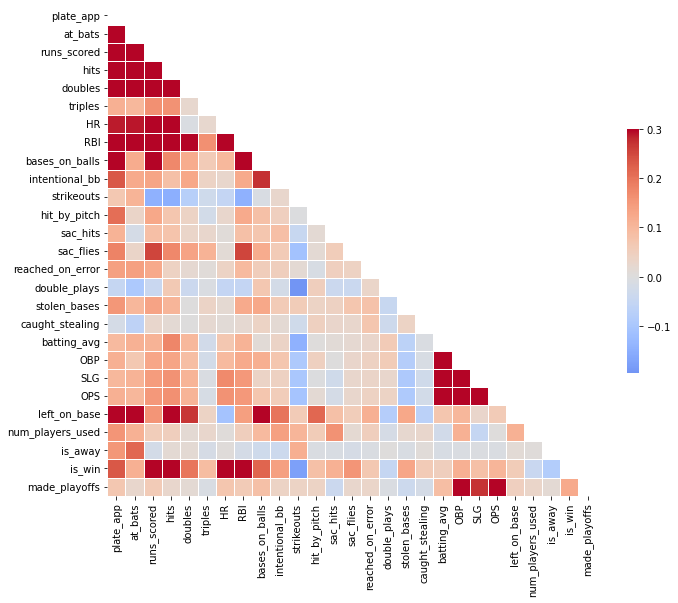

In [45]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

- The correlation between variables is weak at about 0.3.


### Let's see what correlates most with wins by using a heatmap


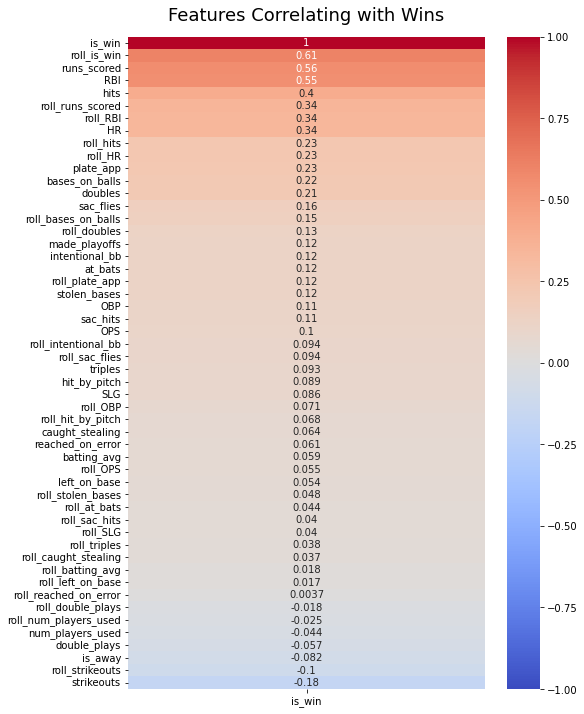

In [46]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['is_win']].sort_values(by='is_win', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Features Correlating with Wins', fontdict={'fontsize':18}, pad=16);

In [47]:
#Look at the correlation with log error
corr_log = train.corrwith(train["is_win"])
corr_log.sort_values(ascending=False)

is_win                   1.000000
roll_is_win              0.608382
runs_scored              0.555565
RBI                      0.548897
hits                     0.402082
roll_runs_scored         0.344783
roll_RBI                 0.342297
HR                       0.339824
roll_hits                0.231762
roll_HR                  0.231744
plate_app                0.226338
bases_on_balls           0.218326
doubles                  0.213667
sac_flies                0.160811
roll_bases_on_balls      0.150218
roll_doubles             0.129658
made_playoffs            0.122500
intentional_bb           0.122044
at_bats                  0.120084
roll_plate_app           0.119685
stolen_bases             0.118395
OBP                      0.114129
sac_hits                 0.112732
OPS                      0.103637
roll_intentional_bb      0.094431
roll_sac_flies           0.094159
triples                  0.092638
hit_by_pitch             0.089330
SLG                      0.086004
roll_OBP      

- When looking at correlation with wins, runs scored, runs batted in, number of hits, and homeruns rank highest.

## Hypothesis Testing: Statistical tests to check for independence among features

In order to create a better model, we will test for independence among baseball hitting features and winning to see if that feature should be used for our model. We will use the correlation rankings above to guide our tests.

In [48]:
#Set our alpha
alpha = 0.05


## Question 1: Is winning related to number of runs scored?

H
0
 : There is no difference between number of runs scored in a winning game and the overall average.

H
a
 : There is a difference between number of runs scored in a winning game and the overall average.



In [49]:
null_hypothesis1 = 'winning is not related to number of runs scored'


In [50]:
winning_games = train[train.is_win == 1]


In [51]:
t, p = stats.ttest_1samp(winning_games.runs_scored, train.runs_scored.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 21.237
p = 0.000


In [52]:
#Was the null hypothesis rejected?

prepare.was_hypothesis_rejected(alpha, null_hypothesis1, p)

We reject the hypothesis that winning is not related to number of runs scored


Text(0.5, 1.0, 'Distribution of Runs Scored by All Teams')

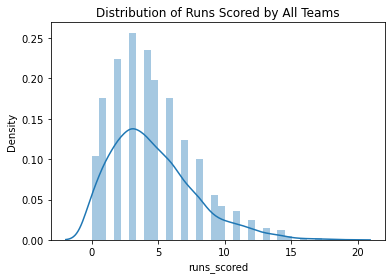

In [53]:
sns.distplot(train.runs_scored)
plt.title('Distribution of Runs Scored by All Teams')

Text(0.5, 1.0, 'Number of Runs Scored with Game Result')

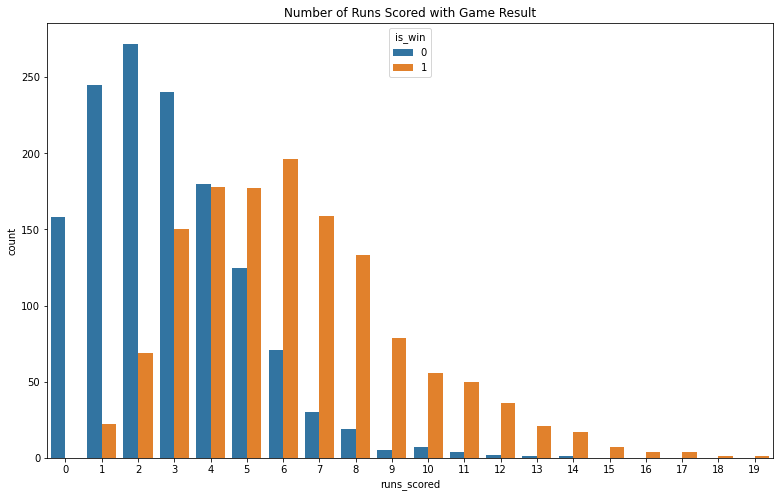

In [54]:
f, ax = plt.subplots(figsize=(13, 8))
ax = sns.countplot(x="runs_scored", hue='is_win',data=train)
plt.title ("Number of Runs Scored with Game Result")

- A higher number of runs were scored in winning games.


## Question 2: Does number of hits differ by winning teams?

H
0
 : There is no difference between number of hits by winning teams and the overall average.

H
a
 : There is a difference between number of hits by winning teams and the overall average.



In [55]:
null_hypothesis2 = 'winning is not related to number of hits in a game'


In [56]:
t, p = stats.ttest_1samp(winning_games.hits, train.hits.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')


t = 14.929
p = 0.000


In [57]:
#Was the null hypothesis rejected?

prepare.was_hypothesis_rejected(alpha, null_hypothesis2, p)

We reject the hypothesis that winning is not related to number of hits in a game


Text(0.5, 1.0, 'Distribution of Hits by All Teams')

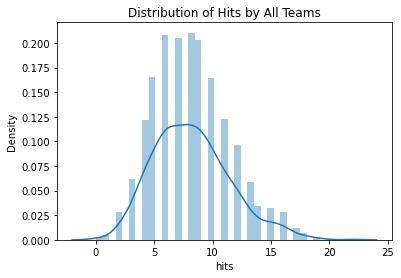

In [58]:
sns.distplot(train.hits)
plt.title('Distribution of Hits by All Teams')

Text(0.5, 1.0, 'Number of Hits in a Game with Game Result')

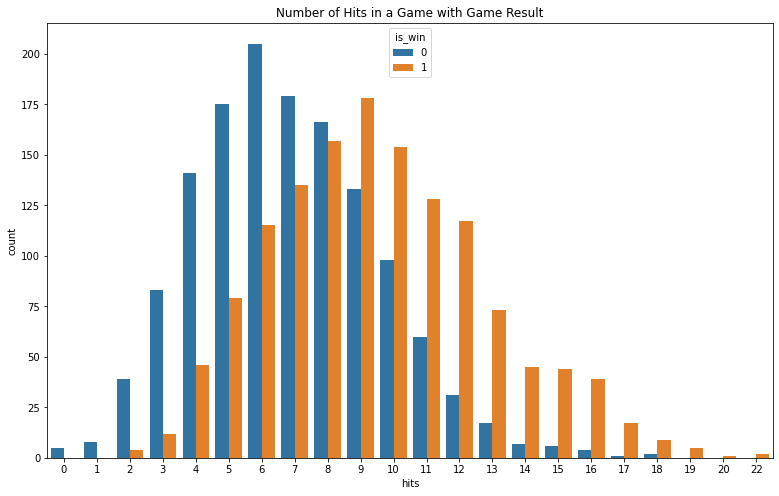

In [59]:
f, ax = plt.subplots(figsize=(13, 8))
ax = sns.countplot(x="hits", hue='is_win',data=train)
plt.title ("Number of Hits in a Game with Game Result")

- Teams that won had a higher number of hits, where teams that lost had less hits.

## Question 3: Does number of homeruns differ by winning teams?

H
0
 : There is no difference between number of homeruns by winning teams and the overall average.

H
a
 : There is a difference between number of homeruns by winning teams and the overall average.

In [60]:
null_hypothesis3 = 'winning is not related to number of homeruns in a game'


In [61]:
t, p = stats.ttest_1samp(winning_games.HR, train.HR.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 11.924
p = 0.000


In [62]:
#Was the null hypothesis rejected?

prepare.was_hypothesis_rejected(alpha, null_hypothesis3, p)

We reject the hypothesis that winning is not related to number of homeruns in a game


Text(0.5, 1.0, 'Distribution of Homeruns by All Teams Per Game')

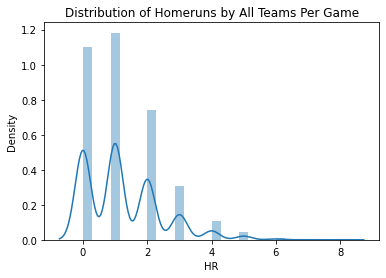

In [63]:
sns.distplot(train.HR)
plt.title('Distribution of Homeruns by All Teams Per Game')

Text(0.5, 1.0, 'Number of Homeruns By A Team in a Game with Game Result')

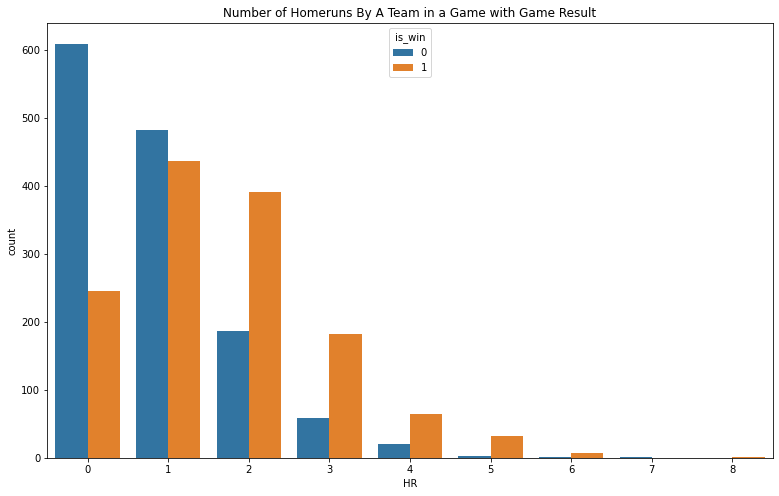

In [64]:
f, ax = plt.subplots(figsize=(13, 8))
ax = sns.countplot(x="HR", hue='is_win',data=train)
plt.title ("Number of Homeruns By A Team in a Game with Game Result")

- Teams with 2 homeruns or more usually won the game.
- Teams with 0 homeruns in a game usually lost.
- Having one homerun in a game does not mean that team will win.
- Teams with high number of homeruns usually won.

## Question 4: Is winning related to the number of runs batted in (RBI)?

H
0
 : There is no difference between number of runs batted in in a winning game and the overall average.

H
a
 : There is a difference between number of runs batted in in a winning game and the overall average.

In [65]:
null_hypothesis4 = 'winning is not related to number of runs batted in a game'


In [66]:
t, p = stats.ttest_1samp(winning_games.RBI, train.RBI.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 20.797
p = 0.000


In [67]:
#Was the null hypothesis rejected?

prepare.was_hypothesis_rejected(alpha, null_hypothesis4, p)

We reject the hypothesis that winning is not related to number of runs batted in a game


Text(0.5, 1.0, 'Distribution of RBIs by All Teams Per Game')

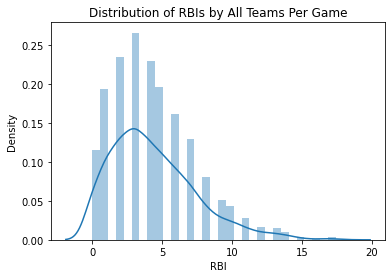

In [68]:
sns.distplot(train.RBI)
plt.title('Distribution of RBIs by All Teams Per Game')

Text(0.5, 1.0, 'Number of RBIs By A Team in a Game with Game Result')

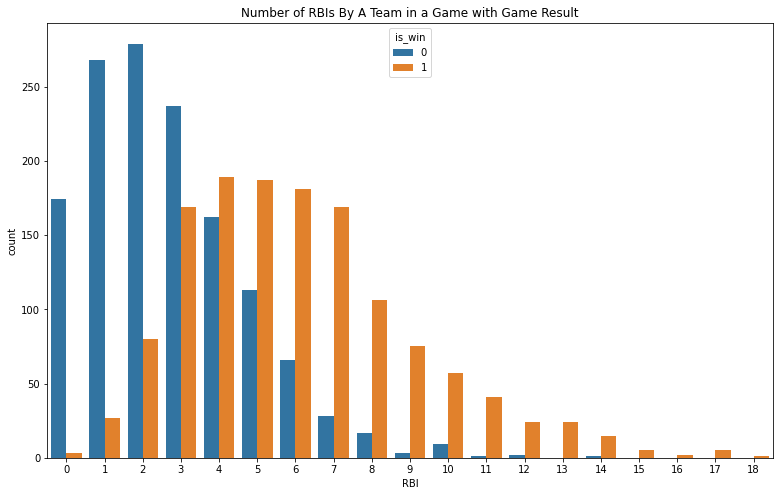

In [69]:
f, ax = plt.subplots(figsize=(13, 8))
ax = sns.countplot(x="RBI", hue='is_win',data=train)
plt.title ("Number of RBIs By A Team in a Game with Game Result")

- Teams with few runs batted in usually lost.
- Teams are more likely to win with higher number of runs batted in.
- Teams are more likely to win if they have 4 or more runs batted in.
- Teams can still lose if they have a high number of runs batted in.

## Question 5: Is winning related to the number of total appearances at the plate by a player in the game?

H
0
 : There is no relationship between winning and the number of plate appearances.

H
a
 : There is a relationship between winning and the number of plate appearances.

In [70]:
null_hypothesis5 = 'winning is not related to number of total plate appearances in a game'


In [71]:
t, p = stats.ttest_1samp(winning_games.plate_app, train.plate_app.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 7.951
p = 0.000


In [72]:
#Was the null hypothesis rejected?

prepare.was_hypothesis_rejected(alpha, null_hypothesis5, p)

We reject the hypothesis that winning is not related to number of total plate appearances in a game


Text(0.5, 1.0, 'Distribution of Plate Appearances by All Teams Per Game')

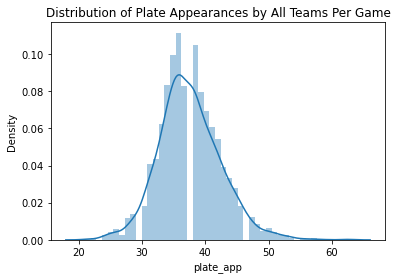

In [73]:
sns.distplot(train.plate_app)
plt.title('Distribution of Plate Appearances by All Teams Per Game')

Text(0.5, 1.0, 'Number of Plate Appearances By A Team in a Game with Game Result')

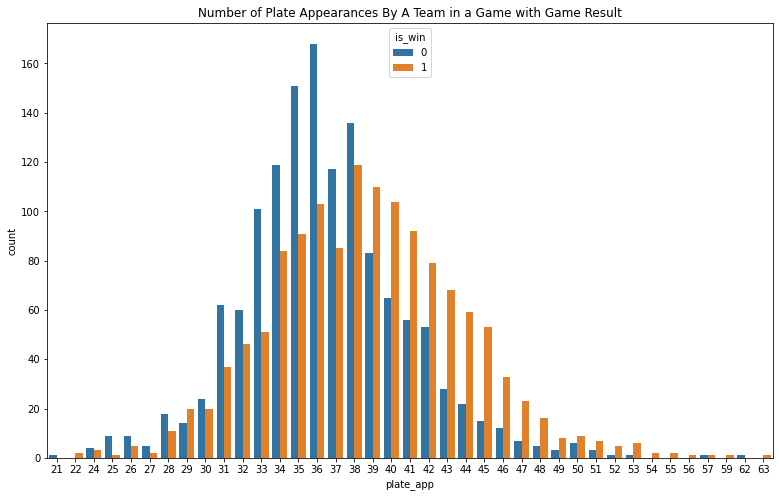

In [74]:
f, ax = plt.subplots(figsize=(13, 8))
ax = sns.countplot(x="plate_app", hue='is_win',data=train)
plt.title ("Number of Plate Appearances By A Team in a Game with Game Result")

- The higher the number of plate appearances by a team, the higher the likelihood of winning.

## Question 6: Is winning related to the number of doubles that were hit in the game?

H
0
 : There is no relationship between winning and the number of doubles in a game.

H
a
 : There is a relationship between winning and the number of doubles in a game.

In [75]:
null_hypothesis6 = 'winning is not related to number of doubles hit in a game'


In [76]:
t, p = stats.ttest_1samp(winning_games.doubles, train.doubles.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 7.236
p = 0.000


In [77]:
#Was the null hypothesis rejected?

prepare.was_hypothesis_rejected(alpha, null_hypothesis6, p)

We reject the hypothesis that winning is not related to number of doubles hit in a game


Text(0.5, 1.0, 'Distribution of Doubles Per Game')

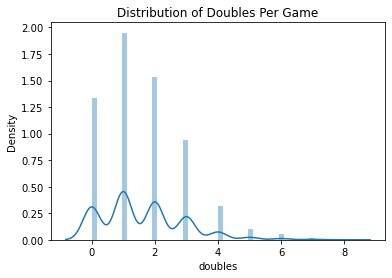

In [78]:
sns.distplot(train.doubles)
plt.title('Distribution of Doubles Per Game')

Text(0.5, 1.0, 'Number of Doubles By A Team in a Game with Game Result')

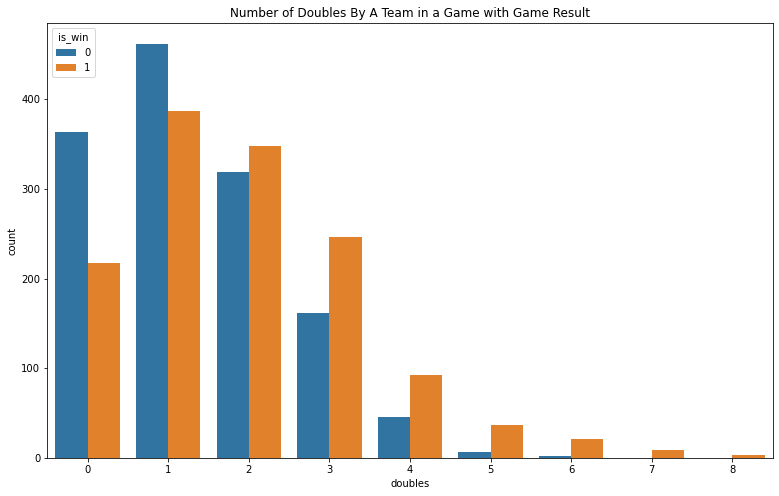

In [79]:
f, ax = plt.subplots(figsize=(13, 8))
ax = sns.countplot(x="doubles", hue='is_win',data=train)
plt.title ("Number of Doubles By A Team in a Game with Game Result")

- Teams with 3 or more doubles per game are more likely to win


## Question 7: Is winning related to the number of bases that were obtained by being walked by the pitcher?
H
0
 : There is no relationship between winning and the number of walks in a game.

H
a
 : There is a relationship between winning and the number of walks in a game.

In [80]:
null_hypothesis7 = 'winning is not related to number of walks in a game'


In [81]:
t, p = stats.ttest_1samp(winning_games.bases_on_balls, train.bases_on_balls.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 7.808
p = 0.000


In [82]:
#Was the null hypothesis rejected?

prepare.was_hypothesis_rejected(alpha, null_hypothesis7, p)

We reject the hypothesis that winning is not related to number of walks in a game


Text(0.5, 1.0, 'Distribution of Walks Per Game')

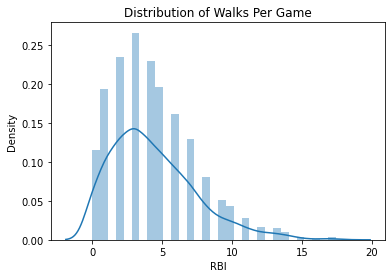

In [83]:
sns.distplot(train.RBI)
plt.title('Distribution of Walks Per Game')

Text(0.5, 1.0, 'Number of Bases Obtained By Being Walked in a Game with Game Result')

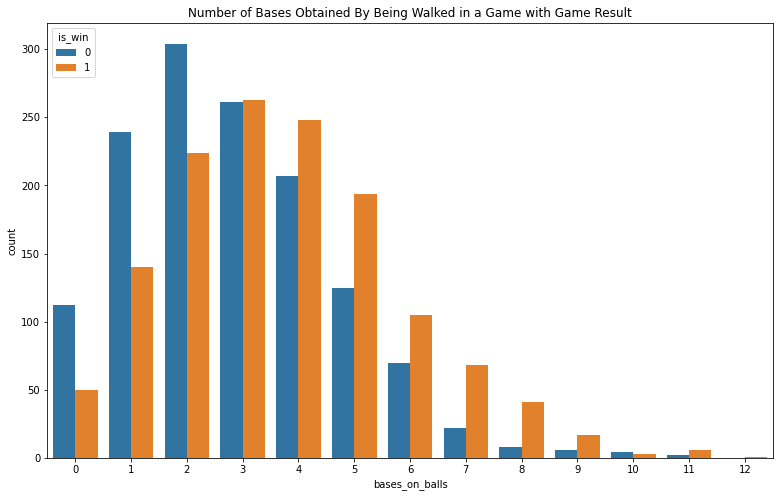

In [84]:
f, ax = plt.subplots(figsize=(13, 8))
ax = sns.countplot(x="bases_on_balls", hue='is_win',data=train)
plt.title ("Number of Bases Obtained By Being Walked in a Game with Game Result")

- Teams with 5 or more bases on balls are more likely to win.

## Question 8: Is winning related to whether the team is playing away?

H
0
 : There is no relationship between winning and a team playing away.

H
a
 : There is a relationship between winning and a team playing away.

### Looking at the two following variables: 
- "is_win" (discrete/categorical) 
- "is_away"(discrete/categorical)

Since they are 2 (discrete/categorical) variables, we will be using 
X2
 testing

In [85]:
null_hypothesis8 = "winning is independent of whether a team is playing away"


In [86]:
observed = pd.crosstab(train.is_win, train.is_away)
observed

is_away,0,1
is_win,,
0,620,740
1,732,628


In [87]:
# use stats.chi2_contingency test 
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [88]:
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

chi^2 = 18.1197
p     = 0.0000


In [89]:
#Was the null hypothesis rejected?

prepare.was_hypothesis_rejected(alpha, null_hypothesis8, p)

We reject the hypothesis that winning is independent of whether a team is playing away


Text(0.5, 1.0, 'Percentage of Game Results\n Depending on Where Teams Play')

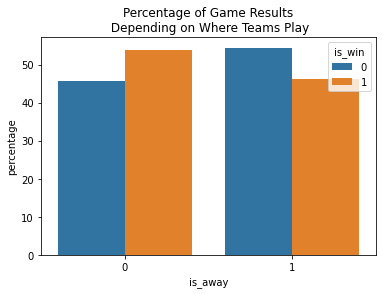

In [90]:
away_pct= (train.groupby(['is_win'])['is_away']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('is_away'))
p = sns.barplot(x="is_away", y="percentage", hue="is_win", data=away_pct)
plt.title("Percentage of Game Results\n Depending on Where Teams Play")

- Teams are more likely to lose when they play away
- Teams have a higher percentage of winning when they play at their home baseball stadium.

# Modeling and Evaluation


After confirming that all features are correlated to winning, we can now create our models to see which performs best on training data.

- Since our target is to predict whether a game was won or lost, we are going to use classification algorithms since we are trying to predict a categorical variable.

The plan to create and evaluate our models is the following:

- Train (fit, transform, evaluate) multiple models, varying the algorithm and/or hyperparameters used
- Establish a baseline accuracy to determine if having a model is better than no model and train and compare at least 3 different models.
- Compare evaluation metrics across all the models you train and select the ones you want to evaluate using the validate dataframe.
- Choose the best model based on the evaluation of your models using the train and validate datasets,
- Test the final model on your out-of-sample data (the testing dataset), summarize the performance, interpret and document results.

## Split the data along the target variable to prepare for use in models¶

- Will be using rolling averages of the past 3 games for each team to predict future outcomes since each baseball team usually plays a series of 3-4 games against another team at a time.

In [91]:
# create X & y version of train, where y is a series with just the target variable and X are the selected features. 

X_train = train[['runs_scored','roll_RBI', 'roll_hits', 'roll_HR','roll_plate_app',
                 'roll_doubles','roll_bases_on_balls']]
y_train = train.is_win

X_validate = validate[['runs_scored', 'roll_RBI', 'roll_hits', 'roll_HR','roll_plate_app',
                       'roll_doubles','roll_bases_on_balls']]
y_validate = validate.is_win

X_test = test[['runs_scored', 'roll_RBI', 'roll_hits', 'roll_HR','roll_plate_app',
                       'roll_doubles','roll_bases_on_balls']]
y_test = test.is_win

- Take a quick look at how our data was split


In [92]:
X_train.shape, X_validate.shape, X_test.shape


((2720, 7), (1166, 7), (972, 7))

## Setup the baseline
The most frequently observed outcome will be our baseline



In [93]:
train.is_win.value_counts()


1    1360
0    1360
Name: is_win, dtype: int64

- Since both probabilities of winning or losing are the same, it does not matter which outcome we choose as our baseline because it is the same.
- Will choose 0, or lose, for our baseline outcome to run our model against.

In [94]:
baseline = 0

In [95]:
# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_pred = y_train == 0

baseline_accuracy = matches_baseline_pred.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.5


## Decision Tree Model

#### For a first run at it, let's create the Decision Tree object with max_depth of 3.


In [96]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)


In [97]:
#Fit the random forest model to the training data.
clf = clf.fit(X_train, y_train)

In [98]:
#Use the model to get accuracy on training dataset
print('Accuracy of Decision Tree model on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree model on training set: 0.76


In [99]:
# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = clf.predict(X_train)

In [100]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 3 depth")
pd.DataFrame(report)

Tree of 3 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.713759,0.818681,0.755882,0.766220,0.766220
recall,0.854412,0.657353,0.755882,0.755882,0.755882
f1-score,0.777778,0.729201,0.755882,0.753489,0.753489
support,1360.000000,1360.000000,0.755882,2720.000000,2720.000000


In [101]:
#To compare several train and validate data sets, let's run through a range of max_depth values
metrics = []

for i in range(2, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # Evaluate the model's performance on train 
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
dm = pd.DataFrame(metrics)
dm["difference"] = dm.train_accuracy - dm.validate_accuracy
dm

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.747794,0.753859,-0.006065
1,3,0.755882,0.740137,0.015745
2,4,0.767279,0.759005,0.008274
3,5,0.772426,0.753002,0.019425
4,6,0.788603,0.738422,0.050181
5,7,0.816176,0.722127,0.094050
6,8,0.836029,0.734991,0.101038
7,9,0.857721,0.720412,0.137309
8,10,0.884559,0.709262,0.175296
9,11,0.909559,0.709262,0.200296


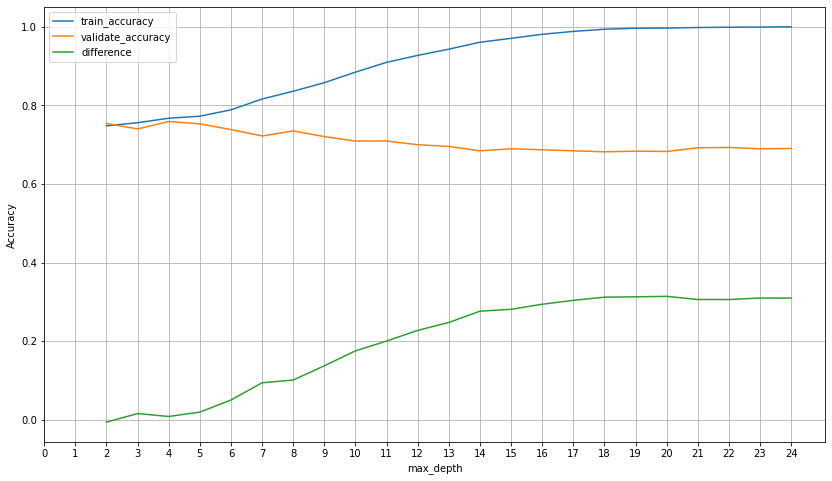

In [102]:
# plot the data
dm.set_index('max_depth').plot(figsize = (14,8))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,25,1))
plt.grid()

In [103]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77       583
           1       0.82      0.62      0.70       583

    accuracy                           0.74      1166
   macro avg       0.76      0.74      0.74      1166
weighted avg       0.76      0.74      0.74      1166



### Decision Tree Model Takeaways:

- Best Decision Tree Model has an accuracy of 0.977 using the train set using max_depth=24 but is very overfit compared to validate's 0.532 accuracy
- Will choose Decision Tree Model with the accuracy of 0.637 using the train set is not overfit with a 0.600 using max_depth=6 and it performed better on validate than on test
- Both are higher than the baseline accuracy of 0.5


### Random Forest Model

Let's try another machine learning algorithm to compare performance.

In [104]:
# Make the model - start with max_depth of 5
forest1 = RandomForestClassifier(max_depth=5, random_state=123)

# Fit the model (on train and only train)
tree1 = forest1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = forest1.predict(X_train)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 5 depth")
pd.DataFrame(report)

Tree of 5 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.778267,0.779087,0.778676,0.778677,0.778677
recall,0.779412,0.777941,0.778676,0.778676,0.778676
f1-score,0.778839,0.778514,0.778676,0.778676,0.778676
support,1360.000000,1360.000000,0.778676,2720.000000,2720.000000


In [105]:
# Looking at a range of max_depths, let's compare in-sample to out-of-sample again using Random Forest 
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
dm = pd.DataFrame(metrics)
dm["difference"] = dm.train_accuracy - dm.validate_accuracy
dm

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.752941,0.744425,0.008516
1,3,0.761765,0.755575,0.006190
2,4,0.769853,0.763293,0.006560
3,5,0.778676,0.763293,0.015383
4,6,0.801471,0.765009,0.036462
5,7,0.823897,0.771012,0.052885
6,8,0.844118,0.768439,0.075679
7,9,0.872059,0.768439,0.103620
8,10,0.906618,0.766724,0.139894
9,11,0.937868,0.765009,0.172859


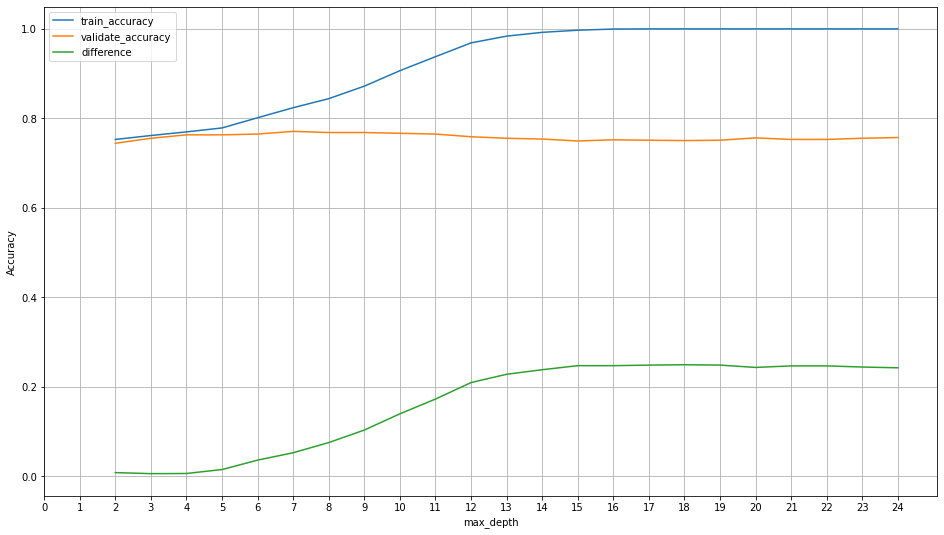

In [106]:
# plot the data
dm.set_index('max_depth').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,25,1))
plt.grid()

### Random Forest Model Takeaways:

- Best Random Forest Model has an accuracy of 1.0 onthe train data set but is very overfit comparing to 0.57 on the validate data set
- Choosing Random Forest Model with an accuracy of 0.657 on the train data set which is not overfit comparing to 0.600 on the validate data set using max_depth = 6
- Both are higher than the baseline accuracy of 0.5


## K-Nearest Neighbors Model
Trying another algorithm for our machine learning model to compare performance

In [107]:
metrics = []

# loop through different values of k
for k in range(1, 25):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remember only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)
    
results["difference"] = results.train_accuracy - results.validate_accuracy
results

,k,train_accuracy,validate_accuracy,difference
0,1,1.000000,0.692967,0.307033
1,2,0.850368,0.676672,0.173695
2,3,0.841176,0.725557,0.115619
3,4,0.820956,0.729846,0.091110
4,5,0.819485,0.746141,0.073345
5,6,0.806250,0.747856,0.058394
6,7,0.813603,0.761578,0.052025
7,8,0.801838,0.756432,0.045406
8,9,0.799632,0.759863,0.039770
9,10,0.788235,0.761578,0.026657


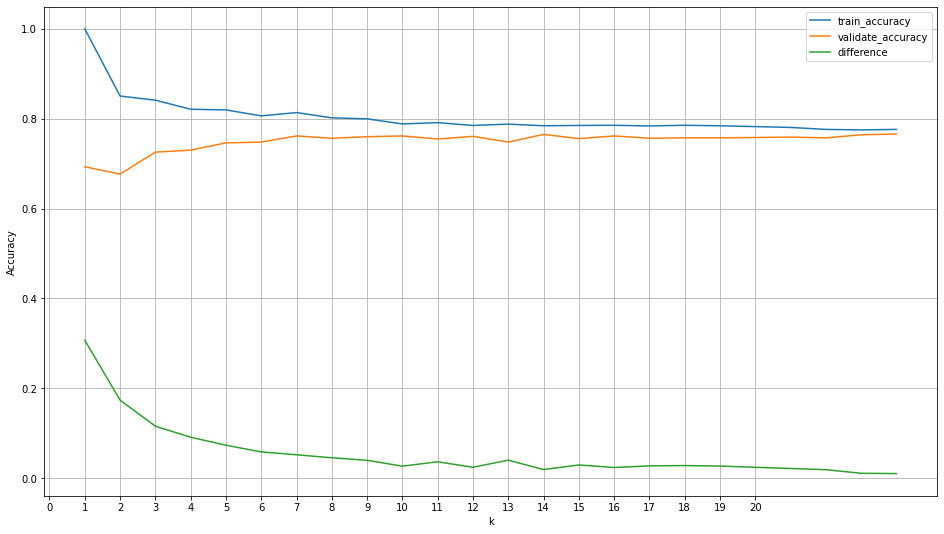

In [108]:
# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

### K-Nearest Neighbors Model Takeaways:

- Best KNN Model has an accuracy of 1.0 on the train data set but is very overfit comparing to 0.525 on the validate data set
- Choosing KNN Model with an accuracy of 0.631 on the train data set which is not overfit comparing to 0.587 on the validate data set using k = 15
- Both are higher than the baseline accuracy of 0.5

## Run Final Test on Best Model: Random Forest Model on Test Dataset

- Choosing Random Forest Model for the best model to use on test because of its highest accuracy in both train and validate with low overfitting.
- It consistently returned higher results than the baseline and low differences between train and validate.

In [109]:
# Make the model
forest_test = RandomForestClassifier(max_depth=6, random_state=123)

# Fit the model (on train and only train)
forest_test = forest.fit(X_train, y_train)

#Use the model to get accuracy on training dataset
print('Accuracy of Random Forest Model on TEST set: {:.2f}'
     .format(forest_test.score(X_test, y_test)))

Accuracy of Random Forest Model on TEST set: 0.76


## Best Model Final Run: Random Forest Model Takeaways:

- Random Forest Model has an accuracy of 58% using out of sample data
- This is higher than the baseline accuracy of 50%

- Features used for this model included 3 game rolling averages for:

    - 'roll_runs_scored' - runs scored
    - 'roll_RBI' - RBI
    - 'roll_hits' - hits per game
    - 'roll_HR' - homeruns
    - 'roll_plate_app' - total plate appearances
    - 'roll_doubles' - doubles
    - 'roll_bases_on_balls' - walks or bases on balls
    
- Our model has an accuracy of 58% in predicting Major League Baseball wins which is a 8% improvement over the baseline of 50% accuracy.

- Our model does not prove to have a significant improvement over the baseline.

- I would like to continue refinining the models by adding additional features used to predict and hyperparameters required for each algorithm.

## Additional question that could be asked when working with this data in the future.

### Can we predict the score of a baseball game given hitting stats for a game?

- Given what we know thus far, we will create a linear regression models to try and predict the number of runs scored in a game based on hitting statistics.


### Exploration of features in relation to predicting the final runs scored in a game

Questions to consider in determining how many runs were scored by a team in a baseball game:

- Are there certain features that are drivers of final score in a baseball game?
- Does the number of walks, hits, singles, doubles, and homeruns ultimately give the final score?
- Do popular baseball player statistics like OPS (On base + slugging percentages), OBP (on base percentage) and SLG (slugging percentage) lead to a good indication of the final score?

# Statistical Testing

### Question 1: Is the RBI of a game related to the final score in the game?

H
0
 : There is no relationship between RBI and the final score for a team in a game.

H
a
 : There is a relationship between RBI and the final score for a team in a game.

In [110]:
null_hyp1 = 'there is no relationship between RBI and the final score for a team in a game'


In [111]:
x = train.RBI
y = train.runs_scored

In [112]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.9871857176070606, 0.0)

In [113]:
#Was the null hypothesis rejected?

prepare.was_hypothesis_rejected(alpha, null_hyp1, p)

We reject the hypothesis that there is no relationship between RBI and the final score for a team in a game


Text(8, 5, 'r = 0.987')

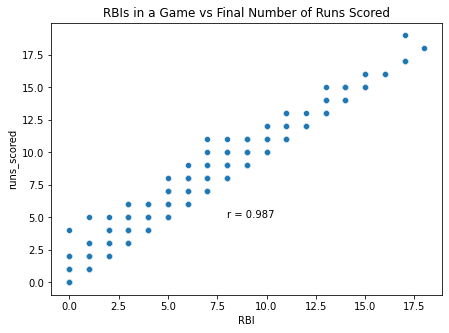

In [114]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.scatterplot(x="RBI", y="runs_scored", data=train)
plt.title('RBIs in a Game vs Final Number of Runs Scored')
plt.text(8, 5, f'r = {corr:.3f}')

RBI and final number of runs scored in a game show a very linear relationship. Will include in my model.

### Question 2: Is the average OPS of a team in a game related to the final score in the game?

H
0
 : There is no relationship between the average OPS of a team and the final score for a team in a game.

H
a
 : There is a relationship between the average OPS of a team and the final score for a team in a game.

In [115]:
null_hyp2 = 'there is no relationship between OPS and the final score for a team in a game'


In [116]:
x = train.OPS
y = train.runs_scored

In [117]:
corr, p = stats.spearmanr(x, y)
corr, p

(0.15214045856442296, 1.493164842067598e-15)

In [118]:
#Was the null hypothesis rejected?

prepare.was_hypothesis_rejected(alpha, null_hyp2, p)

We reject the hypothesis that there is no relationship between OPS and the final score for a team in a game


Text(0.5, 1.0, 'Avg OPS in a Game vs Final Number of Runs Scored')

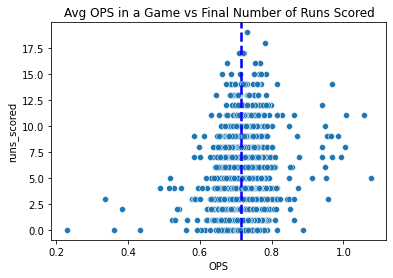

In [119]:
# Set up the matplotlib figure
ax = sns.scatterplot(x="OPS", y="runs_scored", data=train)
plt.axvline(x=train.OPS.mean(),
            color='blue',
            ls='--', 
            lw=2.5)
plt.title('Avg OPS in a Game vs Final Number of Runs Scored')

- Most teams have an average OPS between 0.6 and 0.8.
- It is shown to be correlated to the final number of runs scored in a game and is a highly used statistic when referring to a baseball player's ability to get on base and get a hit.
- I will include it in my model.

### Question 3: Is the average batting average of a team in a game related to the final score in the game?

H
0
 : There is no relationship between the average batting average of a team in a game and the final score.

H
a
 : There is a relationship between the average batting average of a team in a game and the final score.

In [120]:
null_hyp3 = 'there is no relationship between OPS and the final score for a team in a game'


In [121]:
x = train.batting_avg
y = train.runs_scored

In [122]:
corr, p = stats.spearmanr(x, y)
corr, p

(0.11008748456912675, 8.59648932228787e-09)

In [123]:
#Was the null hypothesis rejected?

prepare.was_hypothesis_rejected(alpha, null_hyp3, p)

We reject the hypothesis that there is no relationship between OPS and the final score for a team in a game


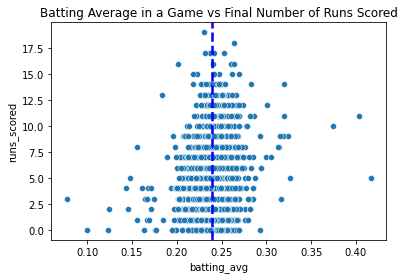

In [124]:
# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(20, 10))
ax = sns.scatterplot(x="batting_avg", y="runs_scored", data=train)
plt.title('Batting Average in a Game vs Final Number of Runs Scored')
plt.axvline(x=train.batting_avg.mean(),
            color='blue',
            ls='--', 
            lw=2.5)
#plt.text(15, 10, f'r = {corr:.3f}')

- Most teams have a batting average between 0.2 and 0.25.
- It is shown to be correlated to the final number of runs scored in a game.
- I will include it in my model to make predictions of final runs scored in a game.


### Takeaways:

- The RBI of a game and the final number of runs scored in a game are related.
- The average OPS, a popular batting statistic used to measure a baseball player's ability to get on base and hit, is related to the final number of runs scored in a game.
- The team's combined batting average for a game is related to the final number of runs scored in a game.

- I will use all features in my model including, OBP (on base percentage) and SLG (slugging percentage) which are used to calculate OPS.

    - Since OPS showed correlation, I will include those in my model as well.

## Modeling

In [125]:
#In order to start modeling, we need to create out X and y for train, validate and test

#Set up x and y 
X_train = train[[ 'roll_RBI', 'roll_OBP', 'roll_SLG', 'roll_OPS', 'roll_batting_avg']]
X_validate = validate[['roll_RBI','roll_OBP', 'roll_SLG', 'roll_OPS', 'roll_batting_avg']]
X_test = test[['roll_RBI','roll_OBP', 'roll_SLG', 'roll_OPS', 'roll_batting_avg']]

#Scale the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

y_train = train.runs_scored
y_validate = validate.runs_scored
y_test = test.runs_scored

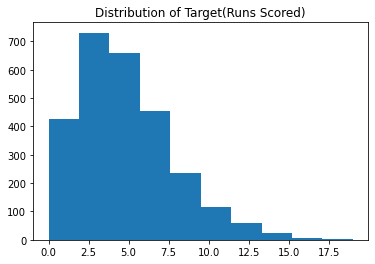

In [126]:
# Let's take a look at the target variable - final number of runs scored in a game by a team
plt.hist(y_train)
plt.title('Distribution of Target(Runs Scored)')
plt.show()

In [127]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

### Recursive Feature Engineering

Recursive Feature Elimination

- Fits a model and eliminates the worst performing features
- Looks at all the features together


In [128]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=1)
rfe.fit(X_train, y_train)
rfe.get_support()

array([False, False,  True, False, False])

In [129]:
X_train.columns[rfe.get_support()]

Index(['roll_SLG'], dtype='object')

In [130]:
pd.Series(rfe.ranking_, index=X_train.columns)


roll_RBI            5
roll_OBP            2
roll_SLG            1
roll_OPS            3
roll_batting_avg    4
dtype: int64

In [131]:
# SLG, OBP, and OPS were the top features identified with the recursive feature selection.


### Baseline for Regression Models

About the initial baseline:

- Before we begin making models, we need to know how well we can estimate (predict) the final error (logerror) without using any features. This is often done by predicting every observation's target value to be the mean or the median. E.g. we could predict every error to be the mean error of all the properties in our training sample. We will try both the mean and the median, see which performs best, and set that evaluation metric value as our baseline performance to beat.
- Predict all errors to be , which is equal to the mean of logerror for the training sample. Store in y_train['logerror_mean'].
- Predict all final errors to be , which is equal to the median of logerror for the training sample. Store in y_train['logerror_median'].
- Compute the RMSE comparing actual final error (logerror) to logerror_mean. Compute the RMSE comparing actual final error (logerror) to logerror_median.

In [132]:
# 1. Predict logerror_pred_mean
runs_pred_mean = y_train.runs_scored.mean()
y_train['runs_pred_mean'] = runs_pred_mean
y_validate['runs_pred_mean'] = runs_pred_mean

In [133]:
runs_pred_mean

4.577205882352941

In [134]:
# 2. compute logerror_pred_median
runs_pred_median = y_train.runs_scored.median()
y_train['runs_pred_median'] = runs_pred_median
y_validate['runs_pred_median'] = runs_pred_median

runs_pred_median

4.0

In [135]:
# 3. RMSE of logerror_pred_mean
rmse_train = mean_squared_error(y_train.runs_scored,
                                y_train.runs_pred_mean) ** .5
rmse_validate = mean_squared_error(y_validate.runs_scored, y_validate.runs_pred_mean) ** (1/2)

In [136]:
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  3.14 
Validate/Out-of-Sample:  3.24


In [137]:
# 4. RMSE of logerror_pred_median
rmse_train = mean_squared_error(y_train.runs_scored, y_train.runs_pred_median) ** .5
rmse_validate = mean_squared_error(y_validate.runs_scored, y_validate.runs_pred_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Median
Train/In-Sample:  3.19 
Validate/Out-of-Sample:  3.28


In [138]:
# create the metric_df as a blank dataframe
metric_df = pd.DataFrame()

# make our first entry into the metric_df with median baseline
metric_df = prepare.make_metric_df(y_train.runs_scored,
                           y_train.runs_pred_median,
                           'median_baseline',
                          metric_df)
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,3.193283,0.0


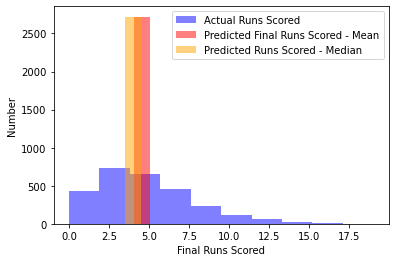

In [139]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.runs_scored, color='blue', alpha=.5, label="Actual Runs Scored")
plt.hist(y_train.runs_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted Final Runs Scored - Mean")
plt.hist(y_train.runs_pred_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted Runs Scored - Median")
plt.xlabel("Final Runs Scored")
plt.ylabel("Number")
plt.legend()
plt.show()

### Linear Regression (OLS)

- Fit the model using X_train (scaled) and the labels from y_train.
- Predict runs scored for games in training sample using our model (lm).
- Evaluate using RMSE
- Repeat predictions and evaluation for validation.

In [140]:
# create the model object/ make the thing
lm = LinearRegression(normalize=True)

In [141]:
# fit the thing
lm.fit(X_train_scaled, y_train.runs_scored)

LinearRegression(normalize=True)

In [142]:
# Predict train/ use the thing! 
y_train['runs_pred_lm'] = lm.predict(X_train_scaled)

In [143]:
# evaluate: rmse
rmse_train = mean_squared_error(y_train.runs_scored, y_train.runs_pred_lm) ** (1/2)

# predict validate
y_validate['runs_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.runs_scored, y_validate.runs_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  2.540701297825408 
Validation/Out-of-Sample:  2.625431635221792


In [144]:
metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.runs_scored, y_validate.runs_pred_lm)}, ignore_index=True)

In [145]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,3.193283,0.000000
1,OLS Regressor,2.625432,0.344144


### LassoLars

- Fit the model using X_train_scaled and the labels from y_train.
- Predict final runs scored in training sample using our model (lars).
- Evaluate using RMSE
- Repeat predictions and evaluation for validation.

In [146]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!
lars.fit(X_train_scaled, y_train.runs_scored)

# predict train
y_train['runs_pred_lars'] = lars.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.runs_scored, y_train.runs_pred_lars) ** (1/2)

# predict validate
y_validate['runs_pred_lars'] = lars.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.runs_scored, y_validate.runs_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  3.140683395840239 
Validation/Out-of-Sample:  3.2408269057455117


In [147]:
metric_df = prepare.make_metric_df(y_validate.runs_scored,
               y_validate.runs_pred_lars,
               'lasso_alpha_1',
               metric_df)


In [148]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,3.193283,0.000000
1,OLS Regressor,2.625432,0.344144
2,lasso_alpha_1,3.240827,0.000000


### TweedieRegressor (GLM)

- Fit the model using X_train_scaled and the labels from y_train.
- Predict runs scored for games in training sample using our model (glm).
- Evaluate using RMSE
- Repeat predictions and evaluation for validation.
- Compare RMSE train vs. validation.

In [149]:
# create the model object
lars = LassoLars(alpha=4)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!
lars.fit(X_train, y_train.runs_scored)

# predict train
y_train['runs_pred_lars'] = lars.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.runs_scored, y_train.runs_pred_lars) ** (1/2)

# predict validate
y_validate['runs_pred_lars'] = lars.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.runs_scored, y_validate.runs_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  3.140683395840239 
Validation/Out-of-Sample:  3.2408269057455117


In [150]:
metric_df = prepare.make_metric_df(y_validate.runs_scored,
               y_validate.runs_pred_lars,
               'lasso_alpha_4',
               metric_df)
metric_df


,model,RMSE_validate,r^2_validate
0,median_baseline,3.193283,0.000000
1,OLS Regressor,2.625432,0.344144
2,lasso_alpha_1,3.240827,0.000000
3,lasso_alpha_4,3.240827,0.000000


## Polynomial Regression

Using sklearn.preprocessing.PolynommialFeatures() + sklearn.linear_model.LinearRegression()

- Create the new features, based on value indicated for degree for train, validate & test.
- Fit the Linear Regression model
- Predict using the transformed (squared or cubed, e.g.) features
- Evaluate using RMSE
- Repeat predictions and evaluation for validation.
- Compare RMSE train vs. validation. Overfitting?

### Polynomial Features

In [151]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 =  pf.transform(X_test_scaled)

### Linear Regression


In [152]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.runs_scored)

# predict train
y_train['runs_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.runs_scored, y_train.runs_pred_lm2) ** (1/2)

# predict validate
y_validate['runs_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.runs_scored, y_validate.runs_pred_lm2) ** 0.5

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  2.5347096224959436 
Validation/Out-of-Sample:  2.6304011811484913


In [153]:
metric_df = prepare.make_metric_df(y_validate.runs_scored,
               y_validate.runs_pred_lm2,
               'quadratic',
               metric_df)
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,3.193283,0.000000
1,OLS Regressor,2.625432,0.344144
2,lasso_alpha_1,3.240827,0.000000
3,lasso_alpha_4,3.240827,0.000000
4,quadratic,2.630401,0.341551


### Trying the same model with a degree of 3 to compare performance

In [154]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled
X_train_degree3 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree3 = pf.transform(X_validate_scaled)
X_test_degree3 =  pf.transform(X_test_scaled)

In [155]:
# create the model object
lm3 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm3.fit(X_train_degree3, y_train.runs_scored)

# predict train
y_train['runs_pred_lm3'] = lm3.predict(X_train_degree3)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.runs_scored, y_train.runs_pred_lm3) ** (1/2)

# predict validate
y_validate['runs_pred_lm3'] = lm3.predict(X_validate_degree3)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.runs_scored, y_validate.runs_pred_lm3) ** 0.5

print("RMSE for Polynomial Model, degrees=3\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=3
Training/In-Sample:  2.5121346687625796 
Validation/Out-of-Sample:  2.6555996271723


In [156]:
metric_df = prepare.make_metric_df(y_validate.runs_scored,
               y_validate.runs_pred_lm3,
               '3degree_quadratic',
               metric_df)
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,3.193283,0.000000
1,OLS Regressor,2.625432,0.344144
2,lasso_alpha_1,3.240827,0.000000
3,lasso_alpha_4,3.240827,0.000000
4,quadratic,2.630401,0.341551
5,3degree_quadratic,2.655600,0.328725


In [157]:
metric_df.style.format(
                formatter={('RMSE_validate', 'r^2_validate'): "{:.5f}",
                          })

,model,RMSE_validate,r^2_validate
0,median_baseline,3.193283,0.000000
1,OLS Regressor,2.625432,0.344144
2,lasso_alpha_1,3.240827,0.000000
3,lasso_alpha_4,3.240827,0.000000
4,quadratic,2.630401,0.341551
5,3degree_quadratic,2.655600,0.328725


## Comparing Models Visually

Plotting actual vs predicted values



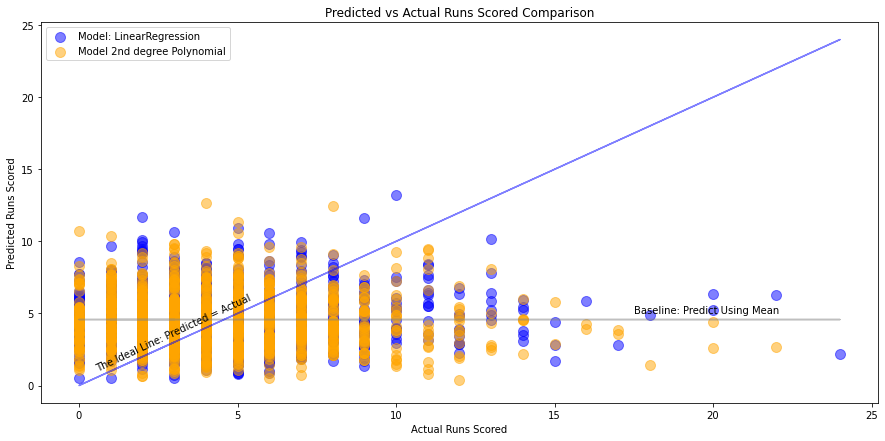

In [158]:
# y_validate.head()
plt.figure(figsize=(15,7))
plt.plot(y_validate.runs_scored, y_validate.runs_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (17.5, 5))
plt.plot(y_validate.runs_scored, y_validate.runs_scored, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 1), rotation=25)

plt.scatter(y_validate.runs_scored.sample(n=1000), y_validate.runs_pred_lm.sample(n=1000), 
            alpha=.5, color="blue", s=100, label="Model: LinearRegression")
#plt.scatter(y_validate.runs_scored.sample(n=1000), y_validate.runs_pred_glm.sample(n=1000), 
            #alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.runs_scored.sample(n=1000), y_validate.runs_pred_lm2.sample(n=1000), 
            alpha=.5, color="orange", s=100, label="Model 2nd degree Polynomial")
#plt.scatter(y_validate.runs_scored.sample(n=1000), y_validate.runs_pred_lm3.sample(n=1000), 
           # alpha=.5, color="orange", s=100, label="Model 3rd degree Polynomial")
plt.legend()
plt.xlabel("Actual Runs Scored")
plt.ylabel("Predicted Runs Scored")
plt.title("Predicted vs Actual Runs Scored Comparison")
plt.show()

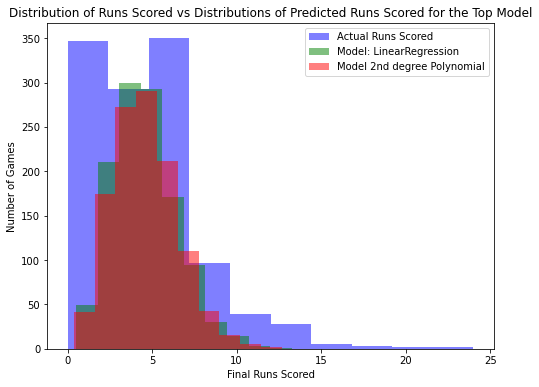

In [159]:
# plot tgo visualize actual vs predicted. 
plt.figure(figsize=(8,6))
plt.hist(y_validate.runs_scored, color='blue', alpha=.5, label="Actual Runs Scored")
plt.hist(y_validate.runs_pred_lm, color='green', alpha=.5, label="Model: LinearRegression")
#plt.hist(y_validate.runs_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.runs_pred_lm2, color='red', alpha=.5, label="Model 2nd degree Polynomial")
#plt.hist(y_validate.runs_pred_lm3, color='orange', alpha=.5, label="Model 3rd degree Polynomial")
plt.xlabel("Final Runs Scored")
plt.ylabel("Number of Games")
plt.title("Distribution of Runs Scored vs Distributions of Predicted Runs Scored for the Top Model")
plt.legend()
plt.show()

The models vs the actual for the number of runs scored by a team somewhat align, but look to miss out on predicting the lower and higher ends of runs scored in games.

### After comparing different models, choosing Linear Regressor as the best model to use on test.

## Modeling Takeaways:

- Linear Regression Model performed the best on validate data by having the lowest RMSE and the highest R^2 of 0.211709.
- I will choose the Linear Regression Model to run on out of sample data.

# Running the Best Model on Test Sample



### Model Selection & Out-of-Sample Evaluation

Model selected: Linear Regression



In [160]:
y_test = pd.DataFrame(y_test)

# predict test
y_test['runs_pred_lm'] = lm.predict(X_test_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.runs_scored, y_train.runs_pred_lm) ** (1/2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.runs_scored, y_validate.runs_pred_lm) ** (1/2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.runs_scored, y_test.runs_pred_lm) ** 0.5


print("RMSE for OLS using Linear Regression Model\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate,
     "\nTest/Out-of-Sample: ", rmse_test)

RMSE for OLS using Linear Regression Model
Training/In-Sample:  2.540701297825408 
Validation/Out-of-Sample:  2.625431635221792 
Test/Out-of-Sample:  2.5770647927711003


In [161]:
metric_df = prepare.make_metric_df(y_test.runs_scored,
               y_test.runs_pred_lm,
               'TEST_OLS',
               metric_df)

In [162]:
metric_df.style.format(
                formatter={('RMSE_validate', 'r^2_validate'): "{:.2f}",
                          })

,model,RMSE_validate,r^2_validate
0,median_baseline,3.193283,0.000000
1,OLS Regressor,2.625432,0.344144
2,lasso_alpha_1,3.240827,0.000000
3,lasso_alpha_4,3.240827,0.000000
4,quadratic,2.630401,0.341551
5,3degree_quadratic,2.655600,0.328725
6,TEST_OLS,2.577065,0.365447


### Best Model Final Run Takeaways

- The Linear Regression model performed well on out of sample (test) data with an explained variance score of 17% and came up with the lowest RMSE of 2.76.
- The Linear Regression Model was chosen for the final run on out of sample data.
- Features used for this model include rolling averages for the following baseball hitting stats:
    - 'roll_RBI' - runs batted in; a stat indicating that a baseball player got a hit that resulted in a run being scored.
    - 'roll_OBP' - on base percentage; a stat capturing the percentage a number times a player gets on base
    - 'roll_SLG' - slugging percentage; a stat capturing the hitting 'power' of a baseball player by giving more weight to more base earned hits; Total Bases/At Bats or (1B + 22B + 33B + 4*HR)/AB
    - 'roll_OPS' - a combination of OBP and SLP to measure a baseball players ability to get on base and hit the ball; On-Base + Slugging Percentages
    - 'roll_batting_avg' - the average number of times a baseball player hit the ball and got on base; Hits/At Bats
- Our model is able to predict the number of runs scored in a baseball game better than the baseline.

# Conclusion
The game of baseball, which has been played since the 1800's in the United States, has long been termed "America's pastime". With so many years being played and with every advantage being sought to beat the other team, baseball data has long been gathered and studied to try to find an angle to help a team win. Collecting many offensive and defensive stats, such as number of hits or homeruns in a game or team's average batting average or number of walks or strikeouts, gives an aspiring data scientist many numbers and options to try to create predictive models.

In this project, I sought out to discover the factors that drive a Major League Baseball game win using one season's complete hitting data for all 30 MLB teams. Combining every team's game logs for every game allowed me to collect over 4800 rows of data (30 teams X 162 games). With this data I was able to create a machine learning model using classification algorithms to predict whether a team would win or lose a game using a team's previous 3 games average hitting statistics. I was also able to create a regression model to predict the number of runs a team would have in a game using the team's previous 3 games average hitting statistics.



## Key Takeaways:
- Our model was able to predict a baseball games outcome with an accuracy of 58% beating the baseline of 50%.

- Our model that was predicting the number of runs a baseball team scored also performed better than the baseline accounting for a 17% improvement over the baseline error.

- While not a significant advantage over the baseline, these models may help give a baseball club, a person or group trying their hands at books, or simply a baseball fan an edge in trying to predict the outcome of a game they follow.

## Technical Takeaways:
- Created a machine learning model using classification algorithms to predict whether a team would win or lose a game
- To predict a future outcome, I used a rolling 3 game average to use for modeling.
- Used all 30 Major League Baseball team's hitting game logs for the 2021 season
- The Random Forest Model was chosen as the best model to predict win or lose outcomes
- The top features used in our model included the 3 game rolling averages of:

    - RBIs
    - Number of runs
    - Number of hits
    - Number of homeruns
    - Number of plate appearances
    - Number of doubles
    - Number of walks
    
- Our model was able to beat the baseline and predict with an accuracy of 58% on out of sample data.

- Created a linear regression model to predict the number of runs in a game using a 3 game rolling average.
- The Ordinary Least Squares Linear Regression model proved to run the best on validation data and was chosen as the best model to predict the number of runs in a game.
- The top features used in our model included the 3 game rolling averages of previously played games for the following baseball hitting stats:

    - RBIs - runs batted in; a stat indicating that a baseball player got a hit that resulted in a run being scored.
    - OBP - on base percentage; a stat capturing the percentage a number times a player gets on base
        - SLG - slugging percentage; a stat capturing the hitting 'power' of a baseball player by giving more weight to more base earned hits; Total Bases/At Bats or (1B + 22B + 33B + 4*HR)/AB -OPS - a combination of OBP and SLP to measure a baseball players ability to get on base and hit the ball; On-Base + Slugging Percentages -batting_avg - the average number of times a baseball player hit the ball and got on base; Hits/At Bats
- The Linear Regression model performed well on out of sample (test) data with an explained variance score of 17% and came up with the lowest RMSE of 2.76.

- Our model is able to predict the number of runs scored in a baseball game better than the baseline.

## Next Steps:


With more time, I would like to continue trying out other models using new features and changing the hyperparameters to see if we can beat our forecasting performance. I would also like to create a time series model to predict the future record of a team.